# Population Projection by Region 
In the below notebook I will take a dataset whcih is titled "Estimated Population" or "PEA04" taken from the CSO website which contains details of the population in the Republic of Ireland. 

# Section 1: Data Preparation

In [1]:
#Install relevant liabraries to be used
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#Read in dataset as a dataframe
df = pd.read_csv("Estimated Population.csv")
df.head()

,Statistic Label,Age Group,Sex,Regional Authority Area,Year,UNIT,VALUE
0,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1996,Thousand,250.4
1,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1997,Thousand,250.0
2,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1998,Thousand,253.7
3,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1999,Thousand,259.8
4,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,2000,Thousand,266.2


In [3]:
#Clean up dataset by removing unnecessary columns
selected_columns = ['Age Group', 'Sex', 'Regional Authority Area', 'Year', 'VALUE']
df = df[selected_columns]

In [4]:
#Assess Dataset initially
df.describe()

,Year,VALUE
count,11286.00000,11286.000000
mean,2006.50000,66.119732
std,6.34457,246.956824
min,1996.00000,0.600000
25%,2001.00000,10.700000
50%,2006.50000,17.600000
75%,2012.00000,36.600000
max,2017.00000,4792.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11286 entries, 0 to 11285
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age Group                11286 non-null  object 
 1   Sex                      11286 non-null  object 
 2   Regional Authority Area  11286 non-null  object 
 3   Year                     11286 non-null  int64  
 4   VALUE                    11286 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 441.0+ KB


In [6]:
#Checking columns
df["Age Group"].unique(), df["Sex"].unique(), df["Year"].unique(), df["Regional Authority Area"].unique()

#All columns unique values appear reasonable but we will remove some totalled data

(array(['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
        '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
        '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
        '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
        '80 - 84 years', '85 years and over', 'All ages'], dtype=object),
 array(['Both sexes', 'Male', 'Female'], dtype=object),
 array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
       dtype=int64),
 array(['State', 'Border', 'Midland', 'West', 'Dublin', 'Mid-East',
        'Mid-West', 'South-East', 'South-West'], dtype=object))

In [7]:
#Sub-divide our dataset by gender to be usable in analyis 
df = df[df['Sex'] == 'Both sexes']
#Male_df = df[df['Sex'] == 'Male']
#Female_df = df[df['Sex'] == 'Female']


df.head(10)

,Age Group,Sex,Regional Authority Area,Year,VALUE
0,0 - 4 years,Both sexes,State,1996,250.4
1,0 - 4 years,Both sexes,State,1997,250.0
2,0 - 4 years,Both sexes,State,1998,253.7
3,0 - 4 years,Both sexes,State,1999,259.8
4,0 - 4 years,Both sexes,State,2000,266.2
5,0 - 4 years,Both sexes,State,2001,273.2
6,0 - 4 years,Both sexes,State,2002,277.6
7,0 - 4 years,Both sexes,State,2003,284.3
8,0 - 4 years,Both sexes,State,2004,290.7
9,0 - 4 years,Both sexes,State,2005,296.5


In [8]:
df = df[(df['Sex'] == 'Both sexes') 
                    & (df['Age Group'] == 'All ages') 
                    & (df['Regional Authority Area'] != 'State')]

df.head(10)

# df_Male = df[(df['Sex'] == 'Male') 
#        & (df['Age Group'] == 'All ages') 
#                    & (df['Regional Authority Area'] != 'State')]

#Region_df_Female = df[(df['Sex'] == 'Female') 
#                      & (df['Age Group'] == 'All ages') 
#                      & (df['Regional Authority Area'] != 'State')]


,Age Group,Sex,Regional Authority Area,Year,VALUE
10714,All ages,Both sexes,Border,1996,407.3
10715,All ages,Both sexes,Border,1997,408.2
10716,All ages,Both sexes,Border,1998,410.6
10717,All ages,Both sexes,Border,1999,414.8
10718,All ages,Both sexes,Border,2000,420.5
10719,All ages,Both sexes,Border,2001,425.0
10720,All ages,Both sexes,Border,2002,432.5
10721,All ages,Both sexes,Border,2003,439.6
10722,All ages,Both sexes,Border,2004,449.8
10723,All ages,Both sexes,Border,2005,457.5


In [9]:
#Get the unique years
unique_years = df['Year'].unique()
unique_years

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [10]:
#Now I would like to subset the Population data by Year

#Create a dictionary
dfs_by_year = {}

# Loop through each year and create a subset
for year in unique_years:
    subset_df = df[df['Year'] == year]
    dfs_by_year[year] = subset_df

#Test
dfs_by_year[2009]

,Age Group,Sex,Regional Authority Area,Year,VALUE
10727,All ages,Both sexes,Border,2009,508.2
10749,All ages,Both sexes,Midland,2009,275.4
10771,All ages,Both sexes,West,2009,438.1
10793,All ages,Both sexes,Dublin,2009,1258.5
10815,All ages,Both sexes,Mid-East,2009,520.8
10837,All ages,Both sexes,Mid-West,2009,376.9
10859,All ages,Both sexes,South-East,2009,495.3
10881,All ages,Both sexes,South-West,2009,660.3


In [11]:
dfs_by_year[2009]['VALUE']

10727     508.2
10749     275.4
10771     438.1
10793    1258.5
10815     520.8
10837     376.9
10859     495.3
10881     660.3
Name: VALUE, dtype: float64

# Section 2: Data Visualisation

In [12]:
#Importing relevant libraries
import seaborn as sns
import matplotlib.pyplot as plt

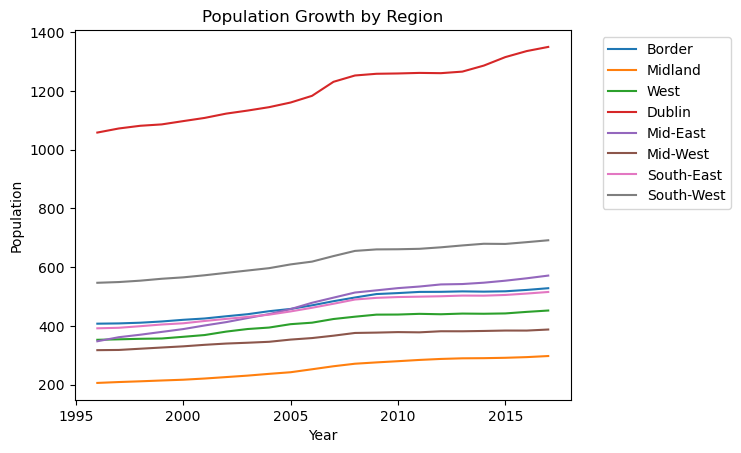

In [14]:
#Creating a line plot showing Population Growth in the local regions for all sexes
sns.lineplot(x=df['Year'], 
             y=df['VALUE'], 
             hue=df['Regional Authority Area'] )

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth by Region')

# Moving the legend to a more appropriate location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Save line chart
plt.savefig('chart1.png', bbox_inches='tight') 


In [ ]:
line_plot = sns.lineplot(x=Region_df_Male['Year'], 
                         y=Region_df_Male['VALUE'], 
                         hue=Region_df_Male['Regional Authority Area'] )

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth by Region')

# Moving the legend to a more appropriate location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Save line chart
plt.savefig('chart2.png', bbox_inches='tight') 

In [ ]:
sns.lineplot(x=Region_df_Female['Year'], 
             y=Region_df_Female['VALUE'], 
             hue=Region_df_Female['Regional Authority Area'] )

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth by Region')

# Moving the legend to a more appropriate location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Save line chart
plt.savefig('chart3.png', bbox_inches='tight') 

In [ ]:
#Make sure to Install if necessary
#pip install dash pandas plotly

In [17]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import base64

# Dash app
app = dash.Dash(__name__)

# Read the line charts as base64 encoded strings
try:
    with open('chart1.png', 'rb') as f:
        chart1_base64 = base64.b64encode(f.read()).decode('utf-8')
except FileNotFoundError:
    print("Error: 'chart1.png' not found!")

try:
    with open('chart2.png', 'rb') as f:
        chart2_base64 = base64.b64encode(f.read()).decode('utf-8')
except FileNotFoundError:
    print("Error: 'chart2.png' not found!")

try:
    with open('chart3.png', 'rb') as f:
        chart3_base64 = base64.b64encode(f.read()).decode('utf-8')
except FileNotFoundError:
    print("Error: 'chart3.png' not found!")

# Layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='chart-selector',
        options=[
            {'label': 'Both Sexes', 'value': 'chart1'},
            {'label': 'Male', 'value': 'chart2'},
            {'label': 'Female', 'value': 'chart3'},
        ],
        value='chart1',  # Default selected value
        style={'width': '35%'}
    ),
    html.Img(id='line-chart'),
])

# Callback to update the displayed line chart based on user selection
@app.callback(
    Output('line-chart', 'src'),
    [Input('chart-selector', 'value')]
)
def update_chart(selected_chart):
    if selected_chart == 'chart1':
        return f'data:image/png;base64,{chart1_base64}'
    elif selected_chart == 'chart2':
        return f'data:image/png;base64,{chart2_base64}'
    elif selected_chart == 'chart3':
        return f'data:image/png;base64,{chart3_base64}'
    else:
        return ''  # Return an empty string for unknown selection

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

I've add in this app above to visually display a mistake that I found in the dataset

We can see that a simple allocation error has occurred, where in 1996 the male and female data has been allocated incorrectly to their respective regions

I will perform the corrections below and display what the corrected data should look like

# Section 3: Geographical Data Visualisation

In [14]:
#Install if necessary
#pip install geopandas

Seeing as we are discussing population by region I think it would be appropriate to display this kind of data with a map.

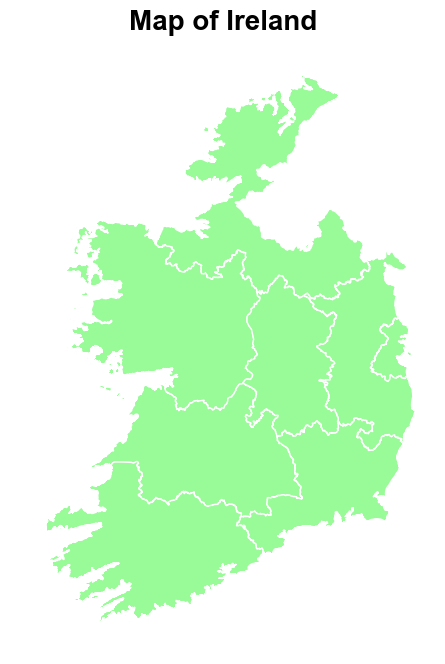

In [16]:
#Load a GeoDataFrame with geometries for Ireland

#Source of Geojson File: 
#https://data.gov.ie/dataset?q=geojson+nuts3&res_format=GEOJSON&sort=score+desc%2C+metadata_created+desc

#Load in the Geojson file
ireland = gpd.read_file("ireland.geojson")

#Make image larger and hide axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')

#Plot the map
ireland.plot(ax=ax, color='#98FB98', edgecolor='white')

#Plot title
plt.title("Map of Ireland", fontsize=20, fontname="Arial", fontweight="bold")

#Plot Map
plt.show()

Next I would like to find out where the NUTS3 Regions are stored in the GeoJSON file

In [17]:
# Print the column names to find out where the NUTS3 regions are stored
print(ireland.columns)

Index(['OBJECTID', 'NUTS1', 'NUTS1NAME', 'NUTS2', 'NUTS2NAME', 'NUTS3',
       'NUTS3NAME', 'GUID', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')


In [18]:
#This is the column that I am looking for
ireland['NUTS3NAME'].unique()

array(['Border', 'West', 'Mid-West', 'South-East', 'South-West', 'Dublin',
       'Mid-East', 'Midlands'], dtype=object)

I can use these as labels on the map above and display these on the centroids of each respective region

In [19]:
# Ignore all warnings as the centroid function likes to display warnings about the inaccuarcy of the centroid...
#... but it is more than accurate enough for our simple display purposes

import warnings
warnings.filterwarnings("ignore")

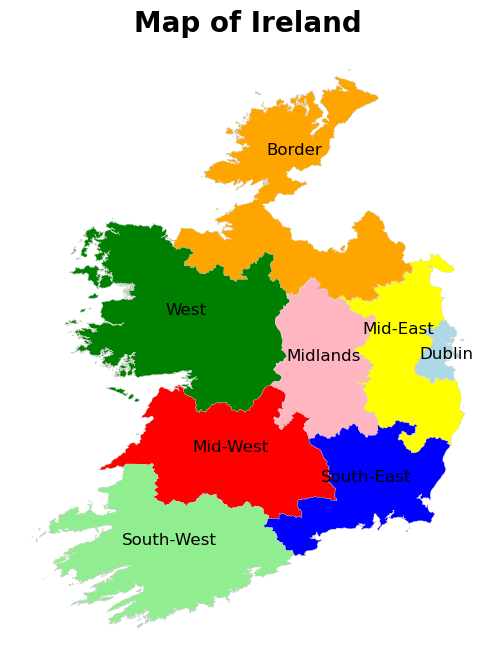

In [20]:
#Import Library
#import matplotlib.pyplot as plt

# Define colors for each region
region_colors = {'Border': 'orange', 'West': 'green', 'Mid-West': 'red','South-East': 
                 'blue','South-West': '#90EE90','Dublin': '#ADD8E6','Mid-East': 'yellow','Midlands': '#FFB6C1',}

fig, ax = plt.subplots(figsize=(8, 8))

for region, color in region_colors.items():
    region_data = ireland[ireland['NUTS3NAME'] == region]
    region_data.plot(ax=ax, color=color, edgecolor='0.8', linewidth=0.2)


# Add labels to the centre of each region
    x, y = region_data.centroid.x.values[0], region_data.centroid.y.values[0]

#I put in some IF statements simply to ensure the labels do not overlap
    if region == 'Mid-East':
        ax.text(x-0.1, y+0.2, region, fontsize=12, ha='center', va='center')
    elif region == 'Border':
        ax.text(x, y+0.4, region, fontsize=12, ha='center', va='center')
    elif region == 'Dublin':
        ax.text(x+0.1, y, region, fontsize=12, ha='center', va='center')
    else:
        # Place label above the centroid for other regions
        ax.text(x, y, region, fontsize=12, ha='center', va='bottom')
    

# Set the aspect ratio
ax.set_aspect(1.5)

# Customize title and turn off axis
plt.title("Map of Ireland", fontsize=20, fontweight="bold")
plt.axis('off')

# Display the plot
plt.show()


In [21]:
#Now it is time to merge this map to our data to create a choropleth map
dfs_by_year[2010]

,Age Group,Sex,Regional Authority Area,Year,VALUE
10728,All ages,Both sexes,Border,2010,511.5
10750,All ages,Both sexes,Midland,2010,279.5
10772,All ages,Both sexes,West,2010,438.4
10794,All ages,Both sexes,Dublin,2010,1259.6
10816,All ages,Both sexes,Mid-East,2010,528.4
10838,All ages,Both sexes,Mid-West,2010,378.6
10860,All ages,Both sexes,South-East,2010,498.0
10882,All ages,Both sexes,South-West,2010,660.8


In [23]:
print(ireland.columns)

Index(['OBJECTID', 'NUTS1', 'NUTS1NAME', 'NUTS2', 'NUTS2NAME', 'NUTS3',
       'NUTS3NAME', 'GUID', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')


In [24]:
dfs_by_year[2010]

,Age Group,Sex,Regional Authority Area,Year,VALUE
10728,All ages,Both sexes,Border,2010,511.5
10750,All ages,Both sexes,Midland,2010,279.5
10772,All ages,Both sexes,West,2010,438.4
10794,All ages,Both sexes,Dublin,2010,1259.6
10816,All ages,Both sexes,Mid-East,2010,528.4
10838,All ages,Both sexes,Mid-West,2010,378.6
10860,All ages,Both sexes,South-East,2010,498.0
10882,All ages,Both sexes,South-West,2010,660.8


In [27]:
# Lets take an initial look at our GeoJSON file before we merge 
gdf = gpd.read_file('ireland.geojson')

print(gdf)

   OBJECTID NUTS1 NUTS1NAME NUTS2             NUTS2NAME  NUTS3   NUTS3NAME  \
0         1    IE   Ireland  IE04  Northern and Western  IE041      Border   
1         2    IE   Ireland  IE04  Northern and Western  IE042        West   
2         3    IE   Ireland  IE05              Southern  IE051    Mid-West   
3         4    IE   Ireland  IE05              Southern  IE052  South-East   
4         5    IE   Ireland  IE05              Southern  IE053  South-West   
5         6    IE   Ireland  IE06   Eastern and Midland  IE061      Dublin   
6         7    IE   Ireland  IE06   Eastern and Midland  IE062    Mid-East   
7         8    IE   Ireland  IE06   Eastern and Midland  IE063    Midlands   

                                   GUID  SHAPE_Length  SHAPE_Area  \
0  B1A65D7C-1984-4A87-AD58-0E846812C992     33.955968    1.594920   
1  A69CA800-8D87-4920-A7C1-50426A1D39B4     41.350987    1.941101   
2  42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78     11.458608    1.396142   
3  27C93D4E-AD0E-4B0C

In [28]:
#I can spot that there is an inconsistent naming convention used when compared to our initial population dataset

# Update the cell value
gdf.at[7, 'NUTS3NAME'] = 'Midland'

In [29]:
#Check my change has worked 
print(gdf)

   OBJECTID NUTS1 NUTS1NAME NUTS2             NUTS2NAME  NUTS3   NUTS3NAME  \
0         1    IE   Ireland  IE04  Northern and Western  IE041      Border   
1         2    IE   Ireland  IE04  Northern and Western  IE042        West   
2         3    IE   Ireland  IE05              Southern  IE051    Mid-West   
3         4    IE   Ireland  IE05              Southern  IE052  South-East   
4         5    IE   Ireland  IE05              Southern  IE053  South-West   
5         6    IE   Ireland  IE06   Eastern and Midland  IE061      Dublin   
6         7    IE   Ireland  IE06   Eastern and Midland  IE062    Mid-East   
7         8    IE   Ireland  IE06   Eastern and Midland  IE063     Midland   

                                   GUID  SHAPE_Length  SHAPE_Area  \
0  B1A65D7C-1984-4A87-AD58-0E846812C992     33.955968    1.594920   
1  A69CA800-8D87-4920-A7C1-50426A1D39B4     41.350987    1.941101   
2  42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78     11.458608    1.396142   
3  27C93D4E-AD0E-4B0C

Now we want to add on the additional columns to allow us to create the choropleth map 

In [30]:
# Create an empty GeoDataFrame to store the merged results
merged_gdf = gdf.copy()

for year in range(1996, 2018):
    # Assuming dfs_by_year[year] is your DataFrame for the current year
    population_data = {
        'match_column': dfs_by_year[year]['Regional Authority Area'].tolist(),
        f'Population_{year}': dfs_by_year[year]['VALUE'].tolist()
    }

    # Convert population data into a DataFrame
    population_df = pd.DataFrame(population_data)

    # Merge the GeoDataFrame with the population DataFrame based on the matching column
    merged_gdf = merged_gdf.merge(population_df, left_on='NUTS3NAME', right_on='match_column', how='left')

    #Drop the Matching columns
    merged_gdf = merged_gdf.drop(['match_column_x', 'match_column_y'], axis=1, errors='ignore')
    
# Print the merged GeoDataFrame
print(merged_gdf)

   OBJECTID NUTS1 NUTS1NAME NUTS2             NUTS2NAME  NUTS3   NUTS3NAME  \
0         1    IE   Ireland  IE04  Northern and Western  IE041      Border   
1         2    IE   Ireland  IE04  Northern and Western  IE042        West   
2         3    IE   Ireland  IE05              Southern  IE051    Mid-West   
3         4    IE   Ireland  IE05              Southern  IE052  South-East   
4         5    IE   Ireland  IE05              Southern  IE053  South-West   
5         6    IE   Ireland  IE06   Eastern and Midland  IE061      Dublin   
6         7    IE   Ireland  IE06   Eastern and Midland  IE062    Mid-East   
7         8    IE   Ireland  IE06   Eastern and Midland  IE063     Midland   

                                   GUID  SHAPE_Length  SHAPE_Area  ...  \
0  B1A65D7C-1984-4A87-AD58-0E846812C992     33.955968    1.594920  ...   
1  A69CA800-8D87-4920-A7C1-50426A1D39B4     41.350987    1.941101  ...   
2  42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78     11.458608    1.396142  ...   
3

In [31]:
#Check the columns 
merged_gdf.columns

Index(['OBJECTID', 'NUTS1', 'NUTS1NAME', 'NUTS2', 'NUTS2NAME', 'NUTS3',
       'NUTS3NAME', 'GUID', 'SHAPE_Length', 'SHAPE_Area', 'geometry',
       'Population_1996', 'Population_1997', 'Population_1998',
       'Population_1999', 'Population_2000', 'Population_2001',
       'Population_2002', 'Population_2003', 'Population_2004',
       'Population_2005', 'Population_2006', 'Population_2007',
       'Population_2008', 'Population_2009', 'Population_2010',
       'Population_2011', 'Population_2012', 'Population_2013',
       'Population_2014', 'Population_2015', 'Population_2016',
       'Population_2017'],
      dtype='object')

Now that I have merged the dataset into the correct format I can create my Choropleth map

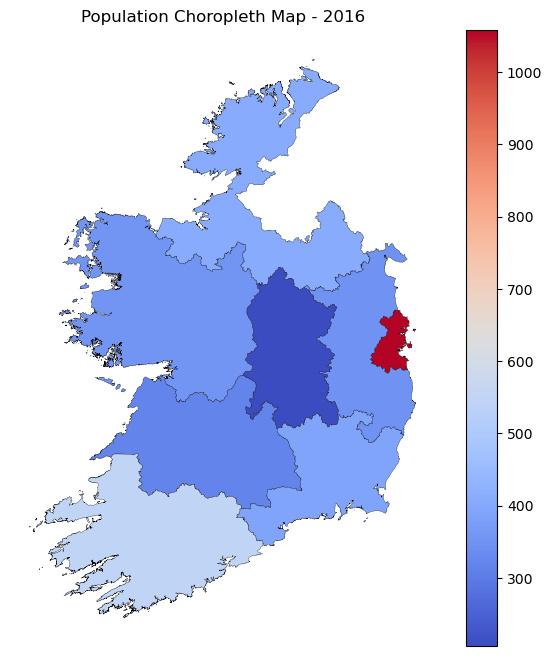

In [32]:
#Create my Choropleth Map for 1996
ax = merged_gdf.plot(column='Population_1996', cmap='coolwarm', 
                     legend=True, figsize=(8, 8), edgecolor='black', 
                     linewidth=0.2)

ax.set_axis_off()

# Add title
plt.title('Population Choropleth Map - 2016')

# Show the plot
plt.show()

This map is clearly showing that Dublin is highly population so I will remove Dublin to make the map more comparable

This map will not be carried forward but I find it interesting

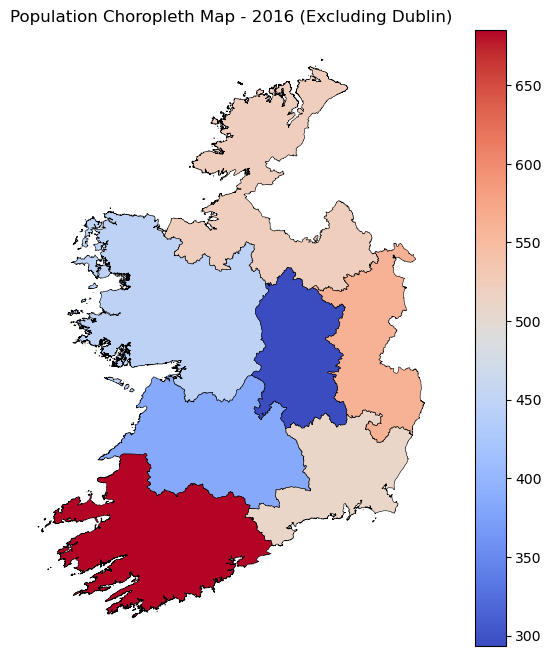

In [33]:
#Have made this variable just in case I would like to exclude another region in future
region_to_exclude = 'Dublin'

# Filter out the region to exclude
filtered_gdf = merged_gdf[merged_gdf['NUTS3NAME'] != region_to_exclude]

# Plot the filtered Dataframe
ax = filtered_gdf.plot(column='Population_2016', cmap='coolwarm', legend=True, 
                       figsize=(8, 8), edgecolor='black', 
                       linewidth=0.4)

ax.set_axis_off()

# Add title
plt.title('Population Choropleth Map - 2016 (Excluding Dublin)')

# Show the plot
plt.show()

The map above really emphasises the significant impact that Dublin's population density has on the initial map

Of course, the maps above only show data for 2016

So I would like to extend this visualisation to display the population data for each year

In [34]:
#import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the years you want to visualize
years_to_visualize = range(1996, 2018)

# Create a function to update the map based on the selected year
def update_map(year):
    fig, ax = plt.subplots(figsize=(8, 8))
    merged_gdf.plot(column=f'Population_{year}', cmap='coolwarm',
                    legend=True, ax=ax, edgecolor='black', linewidth=0.2,
                    vmin=0, vmax=merged_gdf[f'Population_2017'].max())
                    
    
    ax.set_axis_off()
    ax.set_title(f'Population Choropleth Map - {year}')
    
    plt.show()

# Create a slider widget
year_slider = widgets.IntSlider(
    value=min(years_to_visualize),
    min=min(years_to_visualize),
    max=max(years_to_visualize),
    step=1,
    description='Year:',
    continuous_update=False  # Update the map only when the slider is released
)

# Set up the interaction between the slider and the map
widgets.interactive(update_map, year=year_slider)

interactive(children=(IntSlider(value=1996, continuous_update=False, description='Year:', max=2017, min=1996),…

# Section 4: Population Growth Rates

In [54]:
#I just want to trim the dataset to calcuate population growth rates by region 
population_columns = merged_gdf.filter(regex='^Population')
population_columns

,Population_1996,Population_1997,Population_1998,Population_1999,Population_2000,Population_2001,Population_2002,Population_2003,Population_2004,Population_2005,...,Population_2008,Population_2009,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017
0,407.3,408.2,410.6,414.8,420.5,425.0,432.5,439.6,449.8,457.5,...,496.5,508.2,511.5,515.5,515.8,517.3,516.4,517.6,522.3,528.1
1,352.4,354.0,355.8,356.8,362.6,368.6,380.3,389.1,394.1,405.6,...,431.1,438.1,438.4,440.8,439.4,441.7,441.1,442.2,447.5,452.1
2,317.1,317.8,322.0,326.1,330.1,335.3,339.6,342.4,345.6,353.1,...,375.7,376.9,378.6,377.8,381.5,381.4,382.5,383.9,383.8,387.4
3,391.5,393.3,398.7,404.5,408.6,416.5,423.6,430.4,438.0,449.0,...,489.6,495.3,498.0,499.3,500.7,503.0,502.7,505.1,509.9,515.3
4,546.6,549.1,553.8,560.3,565.1,572.2,580.4,588.4,596.4,609.2,...,655.2,660.3,660.8,662.3,667.4,673.8,679.5,678.9,685.0,691.4
5,1058.3,1072.2,1081.4,1086.1,1097.3,1108.2,1122.8,1133.2,1144.8,1160.6,...,1252.7,1258.5,1259.6,1261.5,1260.6,1265.9,1286.4,1315.3,1335.9,1350.0
6,347.4,361.2,369.7,379.3,388.9,401.2,412.6,426.5,440.0,456.9,...,513.4,520.8,528.4,533.8,541.0,542.3,546.9,553.7,561.9,571.1
7,205.5,208.5,211.0,213.8,216.4,220.5,225.4,230.4,236.4,241.9,...,270.9,275.4,279.5,283.8,287.2,289.3,289.8,291.1,293.4,297.1


In [55]:
sub_df = merged_gdf[['NUTS3NAME'] + population_columns.columns.tolist()]
sub_df

,NUTS3NAME,Population_1996,Population_1997,Population_1998,Population_1999,Population_2000,Population_2001,Population_2002,Population_2003,Population_2004,...,Population_2008,Population_2009,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017
0,Border,407.3,408.2,410.6,414.8,420.5,425.0,432.5,439.6,449.8,...,496.5,508.2,511.5,515.5,515.8,517.3,516.4,517.6,522.3,528.1
1,West,352.4,354.0,355.8,356.8,362.6,368.6,380.3,389.1,394.1,...,431.1,438.1,438.4,440.8,439.4,441.7,441.1,442.2,447.5,452.1
2,Mid-West,317.1,317.8,322.0,326.1,330.1,335.3,339.6,342.4,345.6,...,375.7,376.9,378.6,377.8,381.5,381.4,382.5,383.9,383.8,387.4
3,South-East,391.5,393.3,398.7,404.5,408.6,416.5,423.6,430.4,438.0,...,489.6,495.3,498.0,499.3,500.7,503.0,502.7,505.1,509.9,515.3
4,South-West,546.6,549.1,553.8,560.3,565.1,572.2,580.4,588.4,596.4,...,655.2,660.3,660.8,662.3,667.4,673.8,679.5,678.9,685.0,691.4
5,Dublin,1058.3,1072.2,1081.4,1086.1,1097.3,1108.2,1122.8,1133.2,1144.8,...,1252.7,1258.5,1259.6,1261.5,1260.6,1265.9,1286.4,1315.3,1335.9,1350.0
6,Mid-East,347.4,361.2,369.7,379.3,388.9,401.2,412.6,426.5,440.0,...,513.4,520.8,528.4,533.8,541.0,542.3,546.9,553.7,561.9,571.1
7,Midland,205.5,208.5,211.0,213.8,216.4,220.5,225.4,230.4,236.4,...,270.9,275.4,279.5,283.8,287.2,289.3,289.8,291.1,293.4,297.1


In [41]:
#Create my Growth Rates Dataframe 
growth_rates_df = sub_df[['NUTS3NAME']].copy()

# Loop through each pair of years and calculate growth rates
for i in range(1, len(sub_df.columns) - 1):
    current_year_col = sub_df.columns[i + 1]
    previous_year_col = sub_df.columns[i]
    growth_rates_df[current_year_col] = (sub_df[current_year_col] - sub_df[previous_year_col]) / sub_df[previous_year_col]

# Rename the columns
growth_rates_df.columns = ['NUTS3NAME'] + [f"{col.split('_')[1]}" for col in growth_rates_df.columns[1:]]

# Display the growth rates table
growth_rates_df

,NUTS3NAME,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Border,0.002210,0.005879,0.010229,0.013742,0.010702,0.017647,0.016416,0.023203,0.017119,...,0.026038,0.023565,0.006494,0.007820,0.000582,0.002908,-0.001740,0.002324,0.009080,0.011105
1,West,0.004540,0.005085,0.002811,0.016256,0.016547,0.031742,0.023140,0.012850,0.029180,...,0.018667,0.016238,0.000685,0.005474,-0.003176,0.005234,-0.001358,0.002494,0.011986,0.010279
2,Mid-West,0.002208,0.013216,0.012733,0.012266,0.015753,0.012824,0.008245,0.009346,0.021701,...,0.025382,0.003194,0.004510,-0.002113,0.009794,-0.000262,0.002884,0.003660,-0.000260,0.009380
3,South-East,0.004598,0.013730,0.014547,0.010136,0.019334,0.017047,0.016053,0.017658,0.025114,...,0.030303,0.011642,0.005451,0.002610,0.002804,0.004594,-0.000596,0.004774,0.009503,0.010590
4,South-West,0.004574,0.008559,0.011737,0.008567,0.012564,0.014331,0.013784,0.013596,0.021462,...,0.027604,0.007784,0.000757,0.002270,0.007700,0.009589,0.008459,-0.000883,0.008985,0.009343
5,Dublin,0.013134,0.008580,0.004346,0.010312,0.009933,0.013175,0.009263,0.010236,0.013802,...,0.017463,0.004630,0.000874,0.001508,-0.000713,0.004204,0.016194,0.022466,0.015662,0.010555
6,Mid-East,0.039724,0.023533,0.025967,0.025310,0.031628,0.028415,0.033689,0.031653,0.038409,...,0.035081,0.014414,0.014593,0.010220,0.013488,0.002403,0.008482,0.012434,0.014809,0.016373
7,Midland,0.014599,0.011990,0.013270,0.012161,0.018946,0.022222,0.022183,0.026042,0.023266,...,0.032787,0.016611,0.014887,0.015385,0.011980,0.007312,0.001728,0.004486,0.007901,0.012611


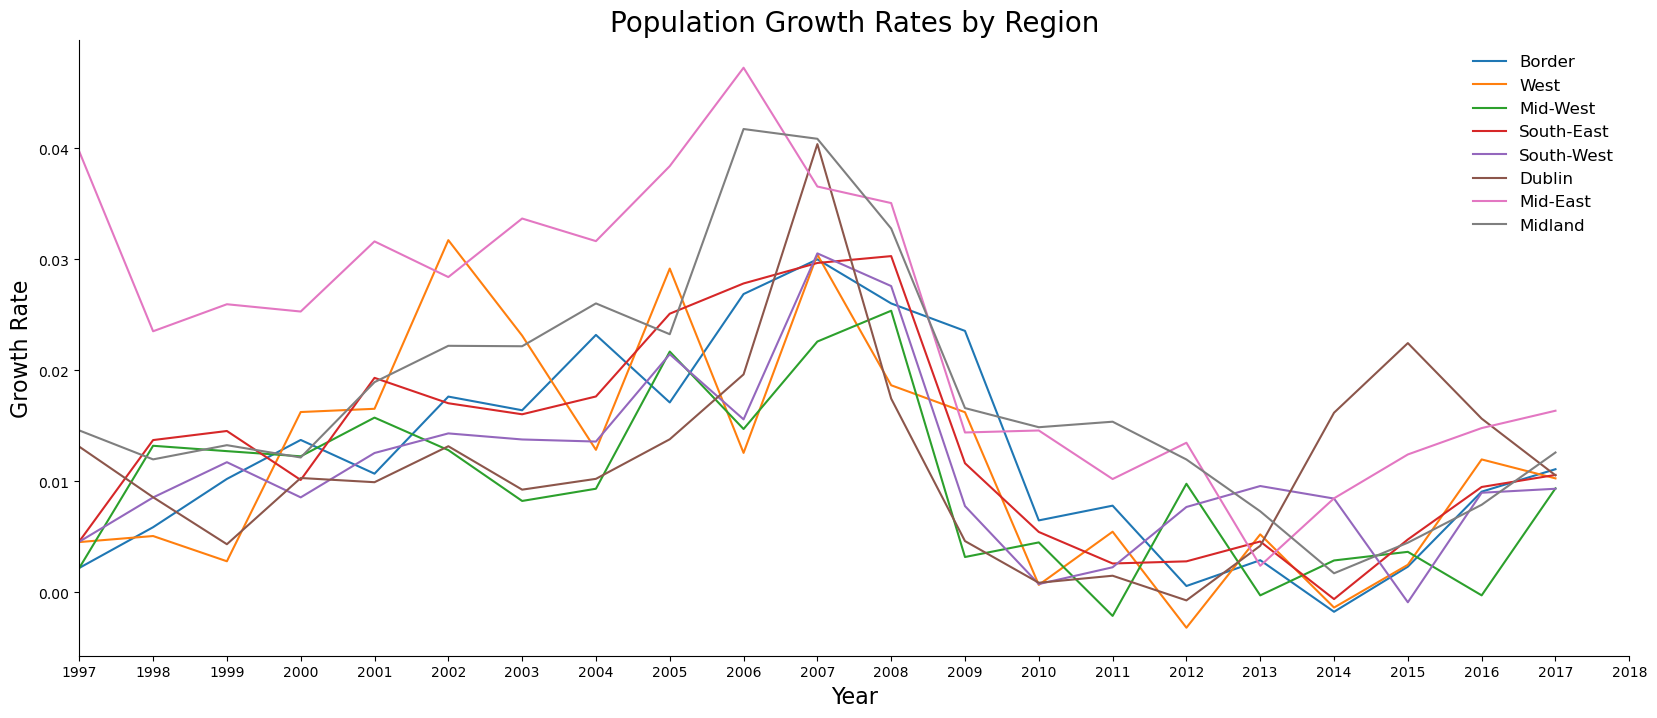

In [42]:
df = pd.DataFrame(growth_rates_df)

# Set 'NUTS3NAME' as the index
df.set_index('NUTS3NAME', inplace=True)

# Plotting
plt.figure(figsize=(20, 8))
for region in df.index:
    plt.plot(df.columns, df.loc[region], label=region)

# Edit the axis and titles 
plt.title('Population Growth Rates by Region', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Growth Rate', fontsize=16)
plt.legend(fontsize=12, frameon=False)
plt.grid(False)
plt.xlim('1997', '2018')
plt.gca().spines['top'].set_visible(False)  # Remove top border
plt.gca().spines['right'].set_visible(False)  # Remove right border


plt.show()


# Section 5: Projection of Population using a Linear Regression Model

In [1]:
#Import the Linear Regression Model from sklearn 
from sklearn.linear_model import LinearRegression

Adjust the Dataframe into the desired format

In [63]:
Pop_df = sub_df.copy()
Pop_df.set_index('NUTS3NAME', inplace=True)

# Rename the columns
Pop_df.columns = Pop_df.columns.str.split('_').str[1]

# Set to integers
Pop_df.columns = Pop_df.columns.astype(int)

# Print the first few rows of the DataFrame to confirm the change
print(Pop_df.head())

             1996   1997   1998   1999   2000   2001   2002   2003   2004  \
NUTS3NAME                                                                   
Border      407.3  408.2  410.6  414.8  420.5  425.0  432.5  439.6  449.8   
West        352.4  354.0  355.8  356.8  362.6  368.6  380.3  389.1  394.1   
Mid-West    317.1  317.8  322.0  326.1  330.1  335.3  339.6  342.4  345.6   
South-East  391.5  393.3  398.7  404.5  408.6  416.5  423.6  430.4  438.0   
South-West  546.6  549.1  553.8  560.3  565.1  572.2  580.4  588.4  596.4   

             2005  ...   2008   2009   2010   2011   2012   2013   2014  \
NUTS3NAME          ...                                                    
Border      457.5  ...  496.5  508.2  511.5  515.5  515.8  517.3  516.4   
West        405.6  ...  431.1  438.1  438.4  440.8  439.4  441.7  441.1   
Mid-West    353.1  ...  375.7  376.9  378.6  377.8  381.5  381.4  382.5   
South-East  449.0  ...  489.6  495.3  498.0  499.3  500.7  503.0  502.7   
South-West

Visualise the current data

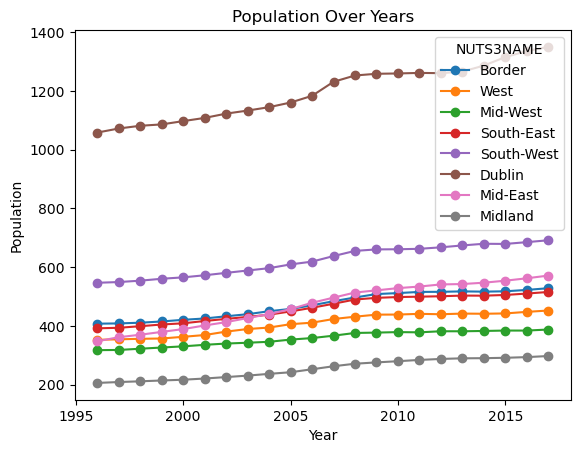

In [75]:
df_new_index = Pop_df.copy()

# Visualize the data with the new index
df_new_index.T.plot(marker='o')
plt.title('Population Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

Apply the Linear regression model to the data, lets start with just 1 region first

In [ ]:
Selection = Pop_df.loc['Dublin']

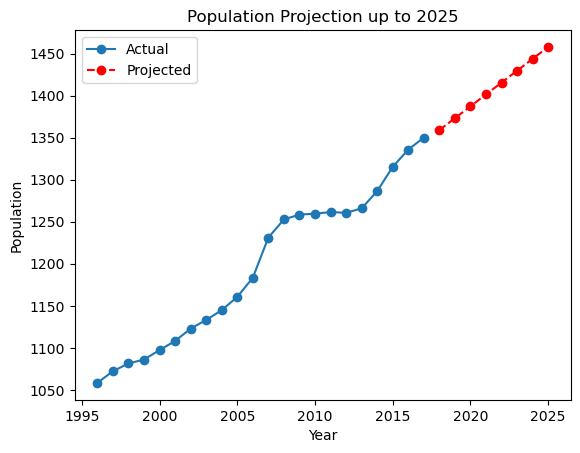

In [96]:
#Use reshape function to...
years = Selection.index.astype(int)
X = np.array(years).reshape(-1, 1) 
y = Selection.values.reshape(-1, 1)  


# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Project population for the next 5 years (2018 to 2022)
future_years = np.array(range(2018, 2026)).reshape(-1, 1)
predictions = model.predict(future_years)

# Visualize the projections
plt.plot(years, y, marker='o', label='Actual')
plt.plot(future_years, predictions, marker='o', linestyle='dashed', color='red', label='Projected')
plt.title('Population Projection up to 2025')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

Now that I've applied a liner regression model to one region I can loop this to the other regions 

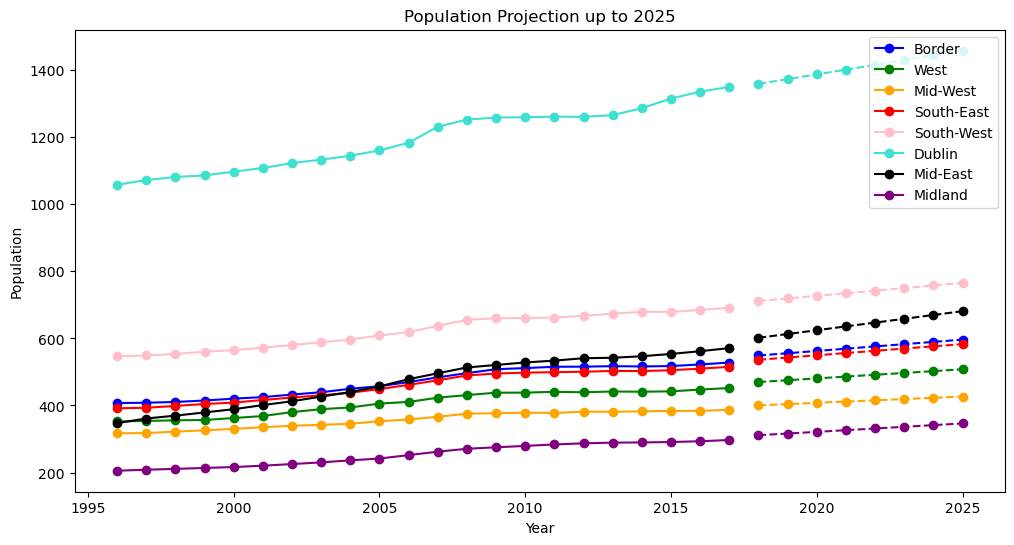

In [100]:
plt.figure(figsize=(12, 6))

# Define colors for each region (you can customize these)
region_colors = {
    'Border': 'blue',
    'West': 'green',
    'Mid-West': 'orange',
    'South-East': 'red',
    'South-West': 'pink',
    'Midland': 'purple',
    'Dublin': 'turquoise',
}

# Loop through all regions
for region in Pop_df.index:
    # Select the data for the current region
    Selection = Pop_df.loc[region]

    # Prepare the features (years) and target variable (population)
    years = Selection.index.astype(int)
    X = np.array(years).reshape(-1, 1)  # Reshape to 2D array
    y = Selection.values.reshape(-1, 1)  # Reshape to 2D array

    # Create a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Project population for the next 5 years (2018 to 2022)
    future_years = np.array(range(2018, 2026)).reshape(-1, 1)
    predictions = model.predict(future_years)

    # Use the assigned color for the region
    color = region_colors.get(region, 'black')  # Default to black if no color is specified
    
    # Visualize the projections with the assigned color
    plt.plot(years, y, marker='o', label=region, color=color)
    plt.plot(future_years, predictions, marker='o', linestyle='dashed', color=color)

# Show the plot
plt.title('Population Projection up to 2025')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()